<a href="https://colab.research.google.com/github/krantikjaat300/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> What is Cardiovascular disease? <b>

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots. It can also be associated with damage to arteries in organs such as the brain, heart, kidneys and eyes.

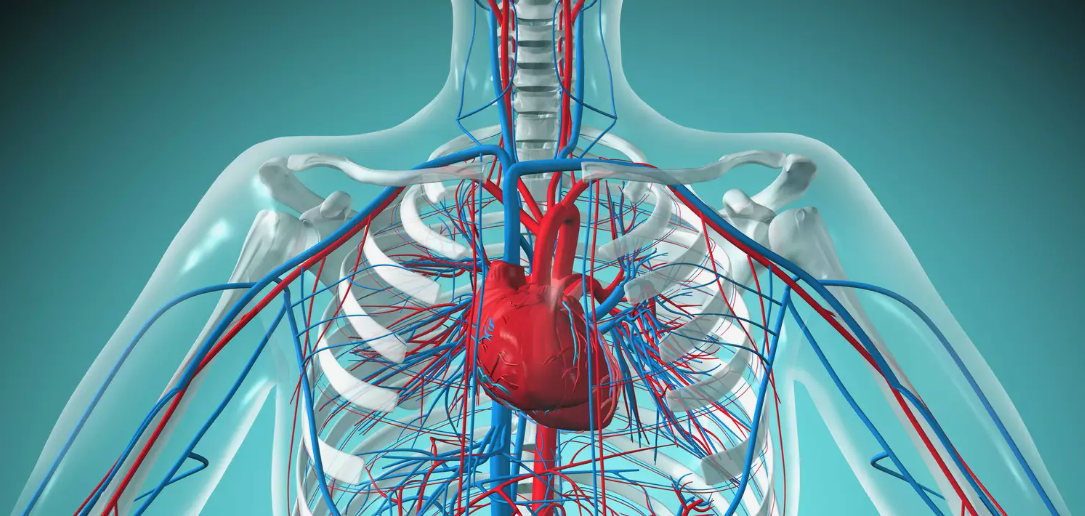


## **Data Description**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**

##### **Each attribute is a potential risk factor. These attributes are demographic, behavioral and medical risk factors.**

**Attribute Informations-**

Demographic
* ***Sex***: male or female("M" or "F")
* ***Age***: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
* ***is_smoking***: whether or not the patient is a current smoker ("YES" or "NO")
* ***Cigs Per Day***: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
* ***BP Meds***: whether or not the patient was on blood pressure medication (Nominal)
* ***Prevalent Stroke***: whether or not the patient had previously had a stroke (Nominal)
* ***Prevalent Hyp***: whether or not the patient was hypertensive (Nominal)
* ***Diabetes***: whether or not the patient had diabetes (Nominal)

Medical(current)
* ***Tot Chol***: total cholesterol level (Continuous)
* ***Sys BP***: systolic blood pressure (Continuous)
* ***Dia BP***: diastolic blood pressure (Continuous)
* ***BMI***: Body Mass Index (Continuous)
* ***Heart Rate***: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* ***Glucose***: glucose level (Continuous)

Predict variable (desired target)
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing dataset
df = pd.read_csv('/content/data_cardiovascular_risk.csv', index_col='id')

In [ ]:
# first five rows
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# last five rows 
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# shape of the dataset
df.shape

(3390, 16)

In [ ]:
# column names
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# statistical summary
df.describe(include='all').T   # T will give transpose of the output..and we are including all columns...

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0
totChol,3352.0,NaN,NaN,NaN,237.074284,45.24743,107.0,206.0,234.0,264.0,696.0


As you can see in statistical summary, features which are continuous in nature [cigsperday, totchol, sysbp,diebp, bmi, heartrate, glucose] there is so much difference in between 75% percentile and max value, It tells that there is skeweness or outlier present in those features.

In [ ]:
# information about the dataset , columns their data type and  null count etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


We can see their are null values present in totChol, BMI, glucose , BPMeds ,cigsPerDay, education has some null values and heartRate has 1 null value.

In [ ]:
# counting missing values
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: ylabel='id'>

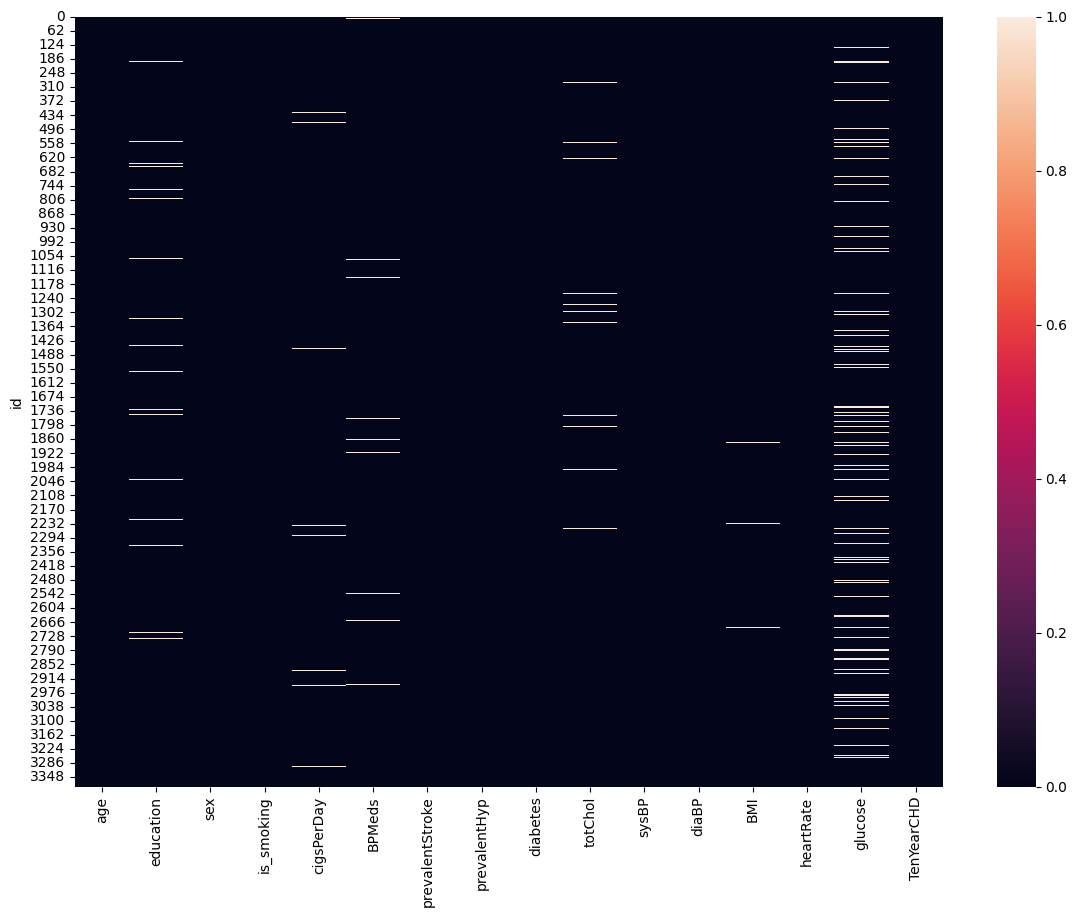

In [ ]:
# Plotting the heatmap for missing values 
plt.figure(figsize=(14,10))
missing_values = df.isna() 
sns.heatmap(missing_values)

First try to understand dataset by performing EDA then later we can deal with null values.

## **EDA**
Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

In [ ]:
for col in df.columns:
  print(f'number of unique category {col} is {df[col].nunique()}') #number of unique category
  print(f'{col} is {df[col].unique()}') #unique category
  print('-'*100)

number of unique category age is 39
age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
----------------------------------------------------------------------------------------------------
number of unique category education is 4
education is [ 2.  4.  1.  3. nan]
----------------------------------------------------------------------------------------------------
number of unique category sex is 2
sex is ['F' 'M']
----------------------------------------------------------------------------------------------------
number of unique category is_smoking is 2
is_smoking is ['YES' 'NO']
----------------------------------------------------------------------------------------------------
number of unique category cigsPerDay is 32
cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
--------------------------------------------

### **Numeric and Category features**

In [ ]:
numeric_features = []
categoric_features = []

# splitting features into numeric and categoric.
'''
whichever feature has more than 10 category appending on numeric_features
and remaing are appending in categoric_features
'''
for col in df.columns:  
  if df[col].nunique() > 10:
    numeric_features.append(col) 
  else:
    categoric_features.append(col) 


print(f'numeric feature : {numeric_features}')
print(f'category feature : {categoric_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


Categorical Features are mostly binary type in our case, hence the values majorly are either 0 and 1 (some exceptions excluded). As for the numeric features, all have a different set of range and continuous values.

### **Univariate Analysis**

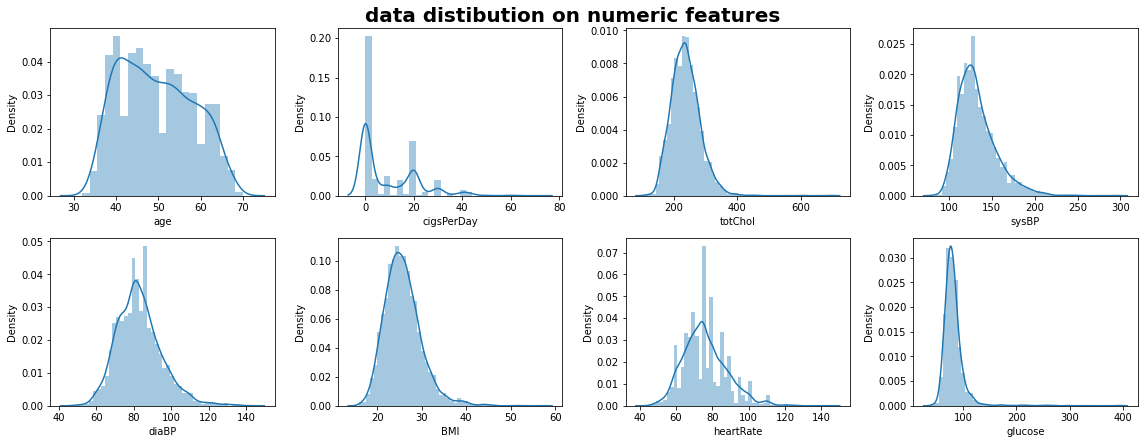

In [ ]:
plt.figure(figsize=(16,6))
plt.suptitle('data distibution on numeric features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  a= sns.distplot(df[col])  
  plt.xlabel(col)
  plt.tight_layout()

We can observe that most of the distributions are right skewed for numeric features. totChol (total cholesterol) and BMI have roughly similar distributions.Glucosehave a highly right skewed distribution. It shows Glucose has a lot of outliers.

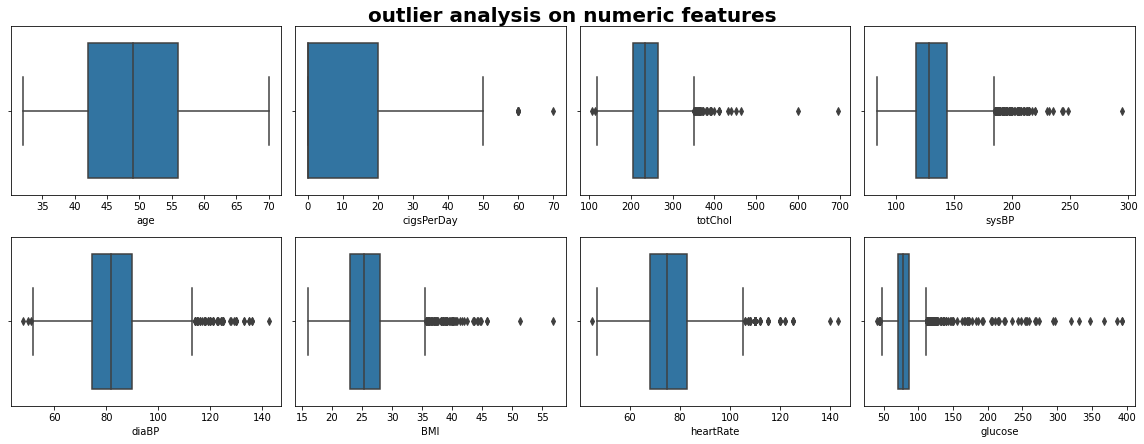

In [ ]:
plt.figure(figsize=(16,6))
plt.suptitle('outlier analysis on numeric features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.tight_layout()

As you can see outlier present in [cigsperday, totchol, sysbp, diabp, bmi, heartrate, glucose] columns.

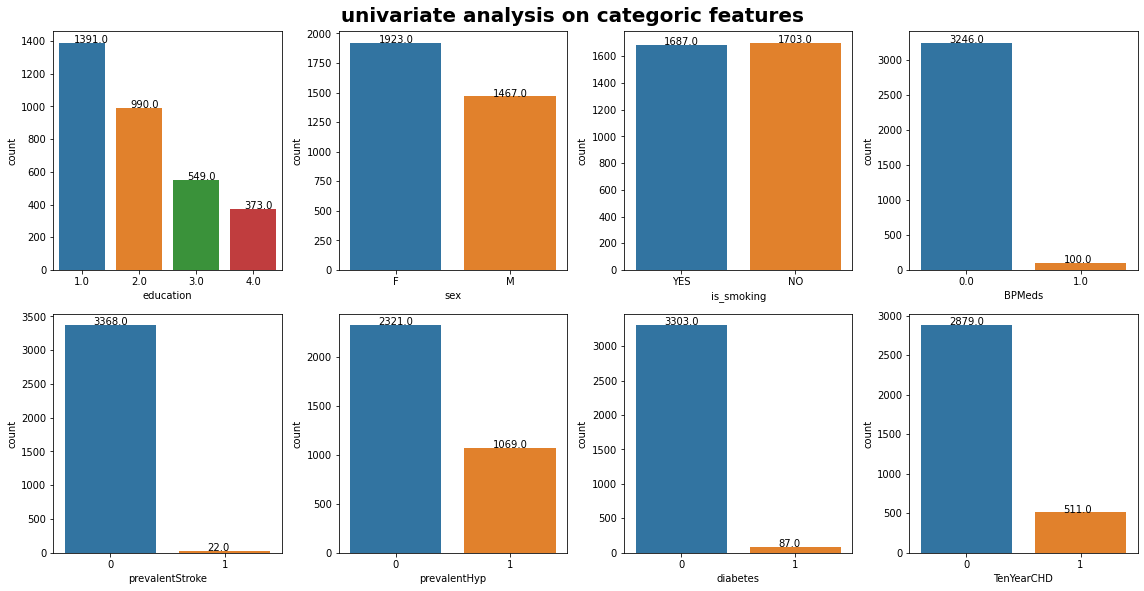

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('univariate analysis on categoric features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categoric_features):
  plt.subplot(2, 4, i+1)
  ax = sns.countplot(df[col])
  plt.xlabel(col)
  plt.tight_layout()
  
  # adding count value on top of bar 
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Obesrvation:
1. Majority number of count belongs from education 1 category and less from education 4 category.
2. Feamle has highest numer of patients comparitively Male patients.
3. Number of No smoking patient and smoking patient are almost same.
4. Highest number of patients are having not blood presure medication.
5. Lowest number of patients had previously a stroke.
6. Lowest number of patients had previously a hypertensive.
7. Lowest number of patients had diabetes.
8. Lowest number of patints had 10-year risk of coronary heart disease CHD. 


### **Bivariate Analysis**

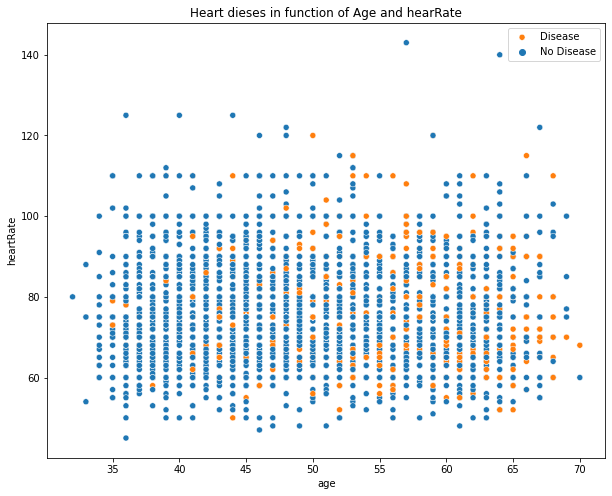

In [ ]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df)
plt.title('Heart dieses in function of Age and hearRate')
plt.legend(['Disease', 'No Disease'])

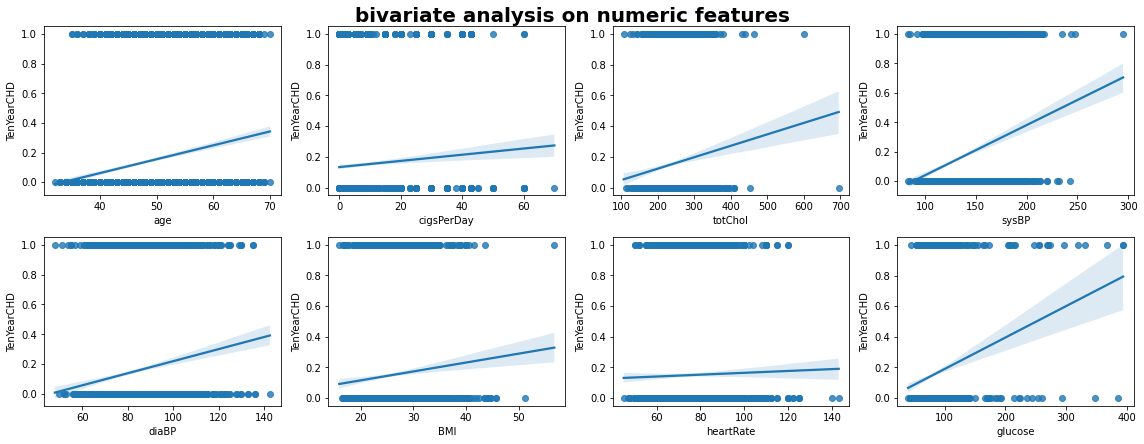

In [ ]:
# Checking Linearity using Bivariate analysis.

plt.figure(figsize=(16,6))
plt.suptitle('bivariate analysis on numeric features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.regplot(x=df[col], y='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

As we can see a lot of of Independent variables show relation with our Target variable.

In [ ]:
# groupby categoric features based on target feature 
for i,col in enumerate(categoric_features[:-1]):
  a = df.groupby(col)[['TenYearCHD']].count().reset_index()
  print(f'\n{a}')


   education  TenYearCHD
0        1.0        1391
1        2.0         990
2        3.0         549
3        4.0         373

  sex  TenYearCHD
0   F        1923
1   M        1467

  is_smoking  TenYearCHD
0         NO        1703
1        YES        1687

   BPMeds  TenYearCHD
0     0.0        3246
1     1.0         100

   prevalentStroke  TenYearCHD
0                0        3368
1                1          22

   prevalentHyp  TenYearCHD
0             0        2321
1             1        1069

   diabetes  TenYearCHD
0         0        3303
1         1          87


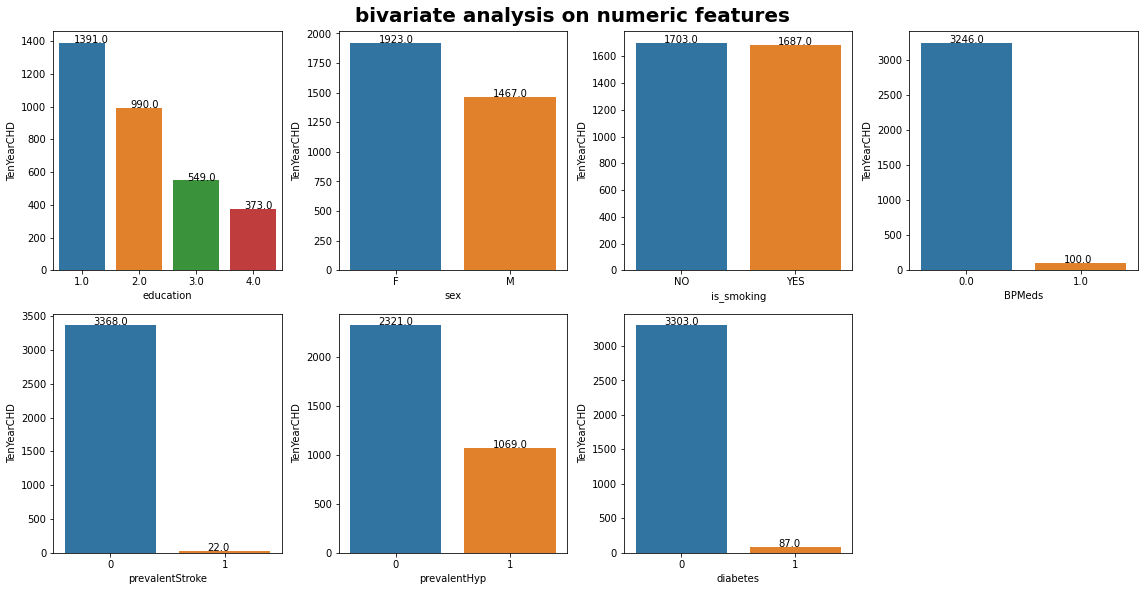

In [ ]:
# Counting number of category present in each feature with respect to target feature  

plt.figure(figsize=(16,8))
plt.suptitle('bivariate analysis on numeric features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categoric_features[:-1]):  # taking all features in categoric column except target feature(TenYearCHD) 
  plt.subplot(2, 4, i+1)
  a = df.groupby(col)[['TenYearCHD']].count().reset_index()
  ax = sns.barplot(x=a[col], y=a['TenYearCHD'])
  plt.xlabel(col)
  plt.tight_layout()

  # adding count values on the top of bar  
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

## **Data Clean-up**
Data cleaning is the process of modifying data to fit the criteria for a specific problem, and you'll have no idea what you might want to change about a data set until you know what's in it.

After EDA we are perfoming data cleaning process.

In [ ]:
# duplicated data
df.duplicated().sum()

0

### **Dealing with Null values**

In [ ]:
print(f'Missing Data Count \n{df.isna().sum()[df.isna().sum()>0]}')
print('='*50)
print(f'Missing Data %  \n{(df.isna().sum()[df.isna().sum()>0] / len(df)*100).round(2)}')

Missing Data Count 
education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64
Missing Data %  
education     2.57
cigsPerDay    0.65
BPMeds        1.30
totChol       1.12
BMI           0.41
heartRate     0.03
glucose       8.97
dtype: float64



glucose and education column have more null values.



```
Usually we replace this null values with the help of other records. But , in this particular case the dataset is related to medical domain,
that said, the entries in this dataset are person specific and the values vary among different individuals. Hence the most logical
option that we have to deal with such values is removing the rows with any null value.

If we try to impute null values using advanced techniques it may affect the result as 
those values will be inaccurate and we can't take any risks in this prediction.
```
**Every single data is important in Heathcare sector, by taking care of that we came with middle solution by setting threshold value, whichever feature has less than 5% nan values present we decide to drop these rows and remaining are imputing, it will affect but not that much while prediction.**


In [ ]:
# features which has less than 5%  null values present. 
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
df.dropna(subset=nan_columns, inplace=True)

In [ ]:
# unique category in glucose cloumn
df.glucose.unique()

array([ 75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  80.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69.,  92., 105.,  93.,  89.,  64.,  83., 170.,  57.,
        58.,  86.,  99., 107., 103.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256.,  47., 172., 111.,
       215., 216., 368., 155., 148., 147., 223., 225., 332., 210., 186.,
       386., 193., 125., 167., 183., 260., 274.])

In [ ]:
'''
glucose level are continuous in nature. 
Outlier are not treating yet thats why imputimg NaN values with median value.
'''

df['glucose'] = df.glucose.fillna(df.glucose.median())

In [ ]:
# counting null values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# statistical summary
df[numeric_features].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,49.423957,9.098150,236.968642,132.436344,82.841173,25.774569,76.034180,81.611163
std,8.556235,11.864621,44.537998,22.176848,11.993650,4.132848,12.056788,23.120381
min,32.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,74.500000,22.940000,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.370000,75.000000,78.000000
75%,56.000000,20.000000,264.000000,143.500000,89.500000,27.990000,83.000000,85.000000
max,70.000000,70.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


**As you can see in statistical summary for numeric features there is so much difference in between 75% percentile and max value, It tells that there is skeweness and outlier present in dataset.**

### **Treating Skeweness**

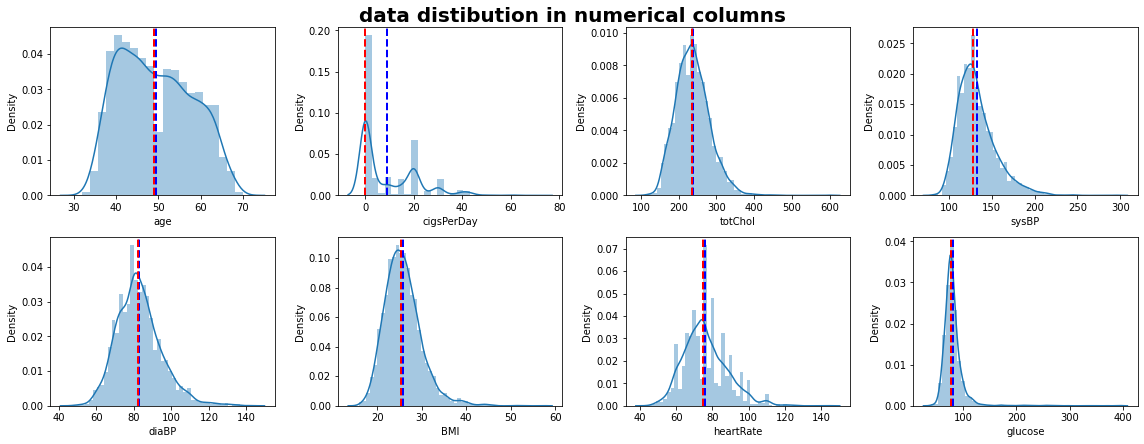

In [ ]:
plt.figure(figsize=(16,6))
plt.suptitle('data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.distplot(df[col]) 
  plt.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.xlabel(col)
  plt.tight_layout()

We can observe that most of the distributions are right skewed for numeric features. totChol (total cholesterol) and BMI have roughly similar distributions.Glucosehave a highly right skewed distribution. It shows Glucose has a lot of outliers.

```
Removal of outliers creates a normal distribution in some of my variables, and makes transformations for the other variables more effective.
Therefore, it seems that removal of outliers before transformation is the better option.
```
first We remove outliers then check again weather we need to apply transformation technique or not.

### **Treating Outliers**

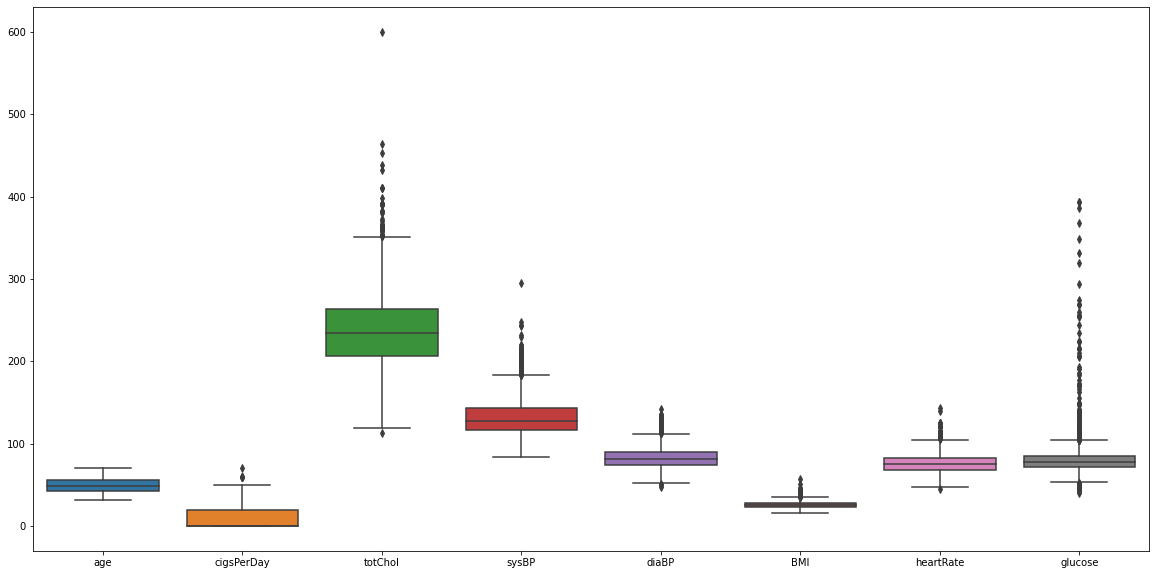

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[numeric_features])
plt.show()

##### **Capping method**

A capping method for outliers is a technique used to handle extreme values in a dataset that may be causing issues with the analysis or modeling of the data. One common method for capping outliers is to replace the outlier values with a maximum or minimum value that is within a certain range of the other values in the dataset. 

For example, if the majority of values in a dataset fall between 0 and 100, an outlier value of 1000 could be replaced with a value of 100 to prevent it from skewing the results. Other capping methods include truncating the values at a specified percentile, or using a robust measure of central tendency such as the median instead of the mean.

In [ ]:
for col in numeric_features:
  
  #usning IQR method to defined range of upper and lower limit.
  IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_limit = df[col].quantile(0.75) + (1.5 * IQR)
  lower_limit = df[col].quantile(0.25) - (1.5 * IQR)

  # replcing with upper_limit, if outlier is higher than upper_limit.
  df[col] = np.where(df[col]>upper_limit, upper_limit, df[col])
  
  # replcing with lower_limit, if outlier is lesser than lower_limit.
  df[col] = np.where(df[col]<lower_limit, lower_limit, df[col])


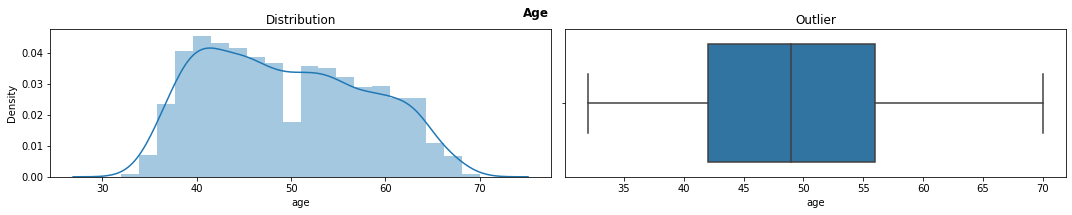

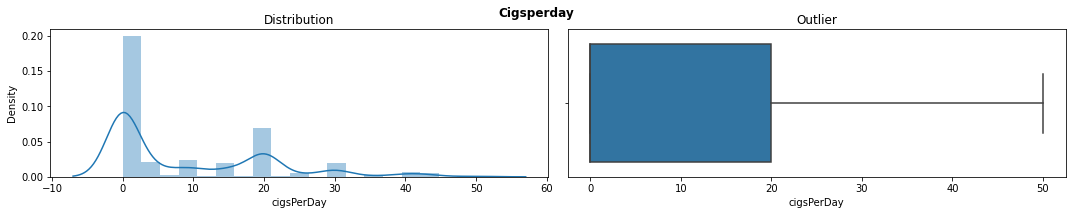

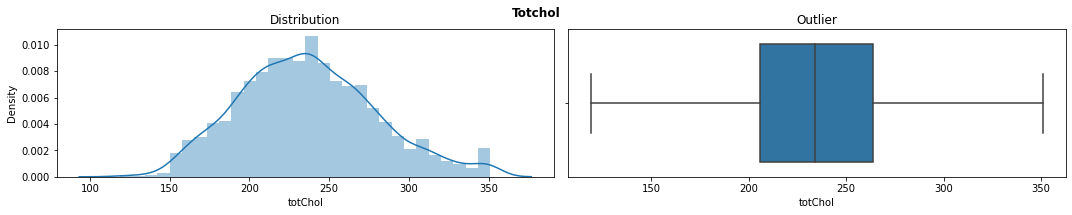

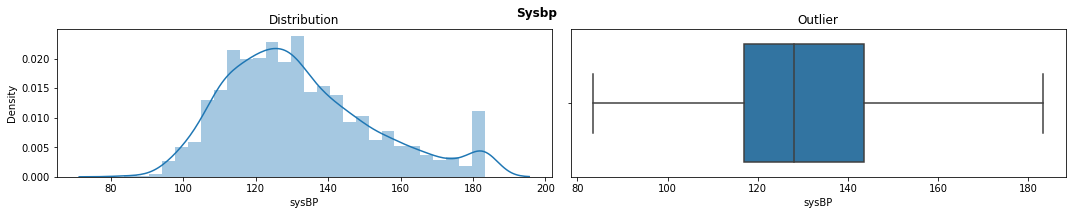

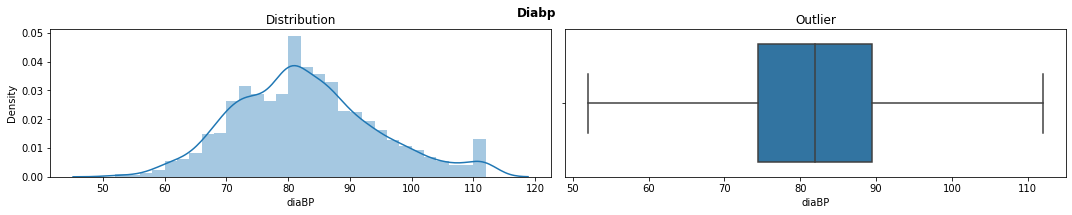

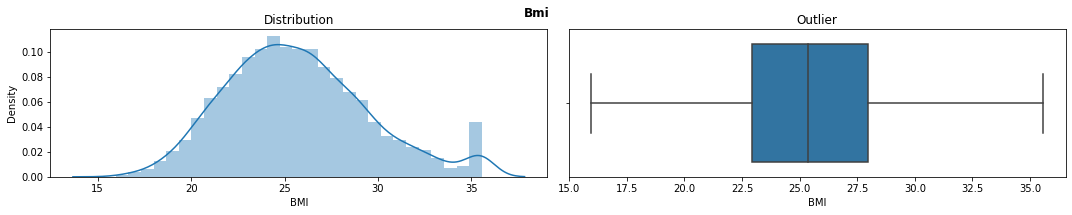

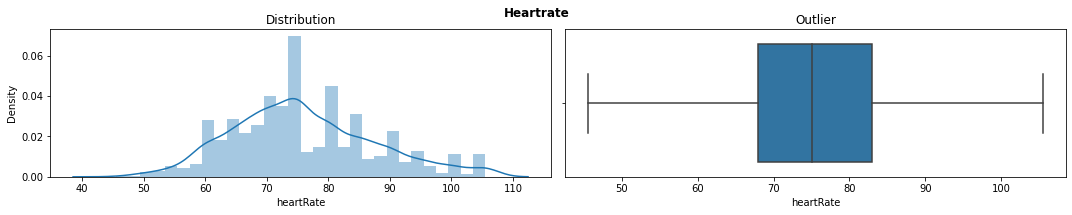

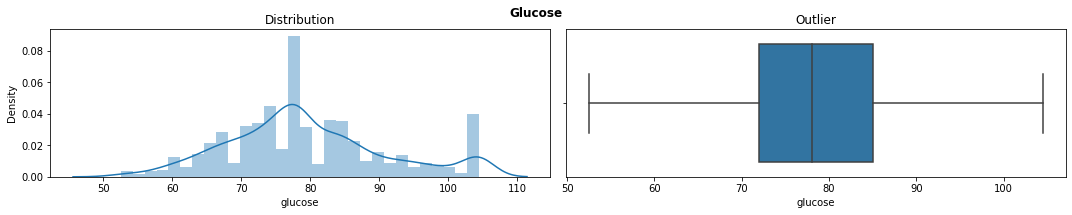

In [ ]:
# checking for outliers after treating them.
for col in numeric_features:
  fig, ax =plt.subplots(1,2, figsize=(15,3)) 
  sns.distplot(df[col], ax=ax[0]).set(title="Distribution")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outlier")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

After treating outliers we can see some changes in data distribution as well. befor handling outlier some of the data are skewed but after treating outlier, features are almost follow normal distribution. So, as of now we are not performing transformation technique on Numerical features.

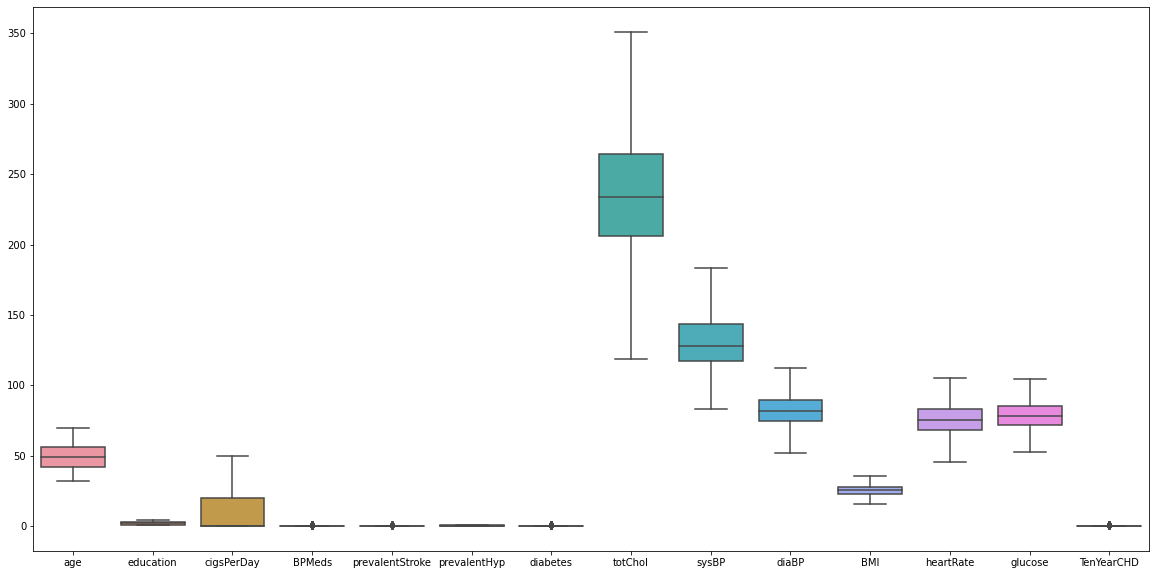

In [ ]:
# Having a look at the box plot in order to look for the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

## **Feature Engineering**
Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. Feature engineering is required when working with machine learning models. Regardless of the data or architecture, a terrible feature will have a direct impact on your model.

### **Encoding**
Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In Dataset almost all of the categories present already in numerical(ordinal) format except sex and is_smoking columns. So, we are performing encoding on these two columns.

In [ ]:
# ordinal Encoding

df['sex'] = df['sex'].map({'M':1, 'F':0})
df['is_smoking'] = df['is_smoking'].map({'YES':1, 'NO':0})

### **Feature Selection**
When building a preddictive model, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. Furthermore adding more and more variables to a model increases the overall complexity of the model.

##### **1. Correlation Coefficient**
Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. 
The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. 
Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

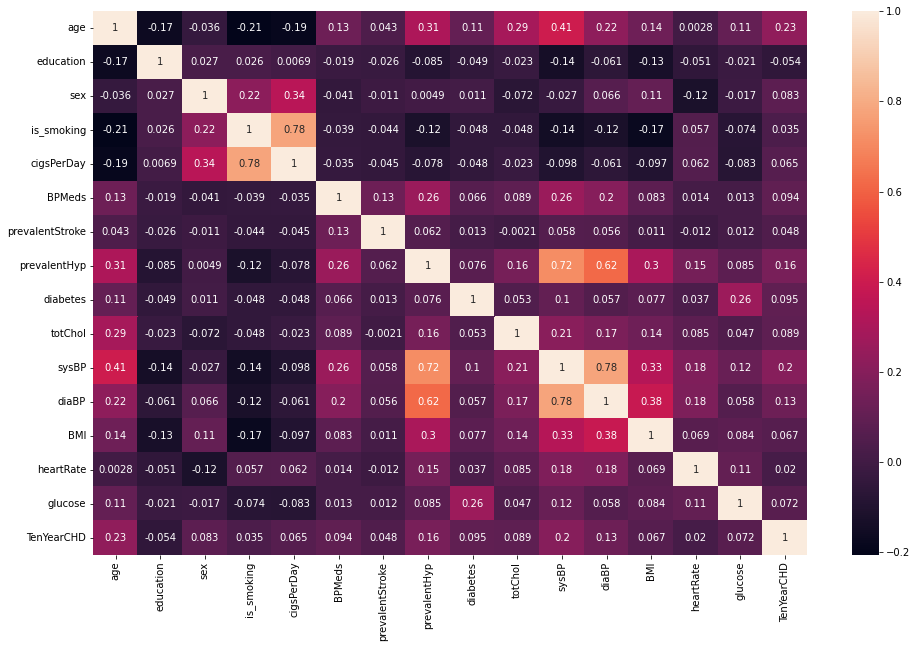

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(df, 0.7)  # setting threshold of 0.7

{'cigsPerDay', 'diaBP', 'sysBP'}



```
Blood pressure readings are given in two numbers.
    - The top number of your blood pressure reading(systolic pressure).
    - The bottom number of your blood pressure readings(diastolic pressure).
```
**The top number (systolic) minus the bottom number (diastolic) is the Pulse Pressure.**
For example, if the resting blood pressure is 120/80 millimeters of mercury (mm Hg), the pulse pressure is 40 — which is considered a 
healthy pulse pressure. Generally, a pulse pressure greater than 40 mm Hg is unhealthy.

Measuring pulse pressure may help a health care provider predict the risk of a heart event, including a heart attack or stroke. 
A pulse pressure greater than 60 is considered a risk factor for cardiovascular disease, especially for older adults.



In [ ]:
# adding new column PulsePressure 
df['PulsePressure'] = df['sysBP'] - df['diaBP']

# dropping the sysBP and diaBP columns
df.drop(columns=['sysBP', 'diaBP'], inplace=True)

In [ ]:
# checking data, weather the provide information is correct or not
df[(df.is_smoking == 'YES') & (df.cigsPerDay == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,PulsePressure
id,,,,,,,,,,,,,,,


**If a person are smoke i.e is_smoking=yes but cigeratte smoked pre day is zero i.e cigsPerDay=0. Then it might become a conflicting case and we must treat them. So, there is no such records available in the dataset.**

Since, there is no conflict case present in is_smoking and cigsPerDay column. cigsPerDay column is sufficient to provide information about is_smoking as well.

In [ ]:
# droping is_smoking column

df.drop('is_smoking', axis=1, inplace=True)

##### **2. Extra Trees Classifier**
The tree-based strategies used by Extra_Tree_Classifier naturally rank by how well they improve the purity of the node, or in other words a decrease in 
the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least 
decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [ ]:
X = df.drop('TenYearCHD', axis=1)
y= df['TenYearCHD']

In [ ]:
# importing libarary
from sklearn.ensemble import ExtraTreesClassifier

# model fitting 
model = ExtraTreesClassifier()
model.fit(X,y)

# ranking feature based on importance
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features.sort_values(ascending=False))

age                0.148750
PulsePressure      0.139085
BMI                0.129857
totChol            0.127048
glucose            0.120451
heartRate          0.119616
cigsPerDay         0.083896
education          0.057447
prevalentHyp       0.024262
sex                0.022658
diabetes           0.011118
BPMeds             0.009934
prevalentStroke    0.005877
dtype: float64


##### **3. Chi-square Test**
We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. 
In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable

In [ ]:
# importing libarary
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# model fitting
ordered_rank_features = SelectKBest(score_func=chi2, k='all')
model = ordered_rank_features.fit(X,y)

# ranking feature based on importance
feature_imp = pd.Series(model.scores_,index=X.columns)
feature_imp.sort_values(ascending=False)

PulsePressure      457.250519
age                249.931510
cigsPerDay         205.859597
totChol            199.719662
prevalentHyp        58.674438
diabetes            27.931583
glucose             27.889622
BPMeds              27.187058
sex                 12.252065
BMI                  8.294096
prevalentStroke      7.219641
education            4.826685
heartRate            2.207399
dtype: float64

##### **4. Information Gain**
Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [ ]:
# importing libarary
from sklearn.feature_selection import mutual_info_classif

# model fitting
mutual_info = mutual_info_classif(X,y)

# ranking feature based on importance. 
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

age                0.029724
PulsePressure      0.012434
glucose            0.009144
prevalentHyp       0.008900
sex                0.007003
cigsPerDay         0.005312
BMI                0.004043
education          0.000000
BPMeds             0.000000
prevalentStroke    0.000000
diabetes           0.000000
totChol            0.000000
heartRate          0.000000
dtype: float64

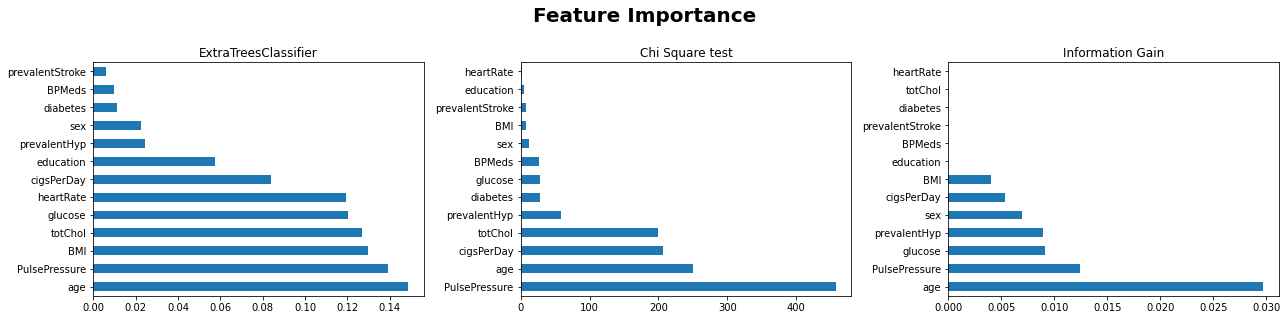

In [ ]:
# plotting graph ---> Feature Importance
fig, axs = plt.subplots(1,3, figsize=(18,4))

ranked_features.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', ax=axs[1])
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[2])

plt.suptitle('Feature Importance', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

**Most important features is age and PulsePressure to predict target variable.**   

In Healthcare industry, every single data is important to analysze or to make prediction on target variable. In this particular case the dataset is related to medical domain, the entries in this dataset are person specific and the values vary among different individuals and all the features are very much important.

I am taking all features to train the model except multicollinerity features.

In [ ]:
# final dataframe
final_df = df
final_df.sample(10)

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,PulsePressure
id,,,,,,,,,,,,,,
2056,51.0,1.0,0,0.0,0.0,0,1,0,216.0,32.35,75.0,103.0,0,56.0
896,43.0,3.0,0,0.0,0.0,0,0,0,214.0,26.11,90.0,82.0,0,43.5
79,57.0,1.0,1,30.0,0.0,0,0,0,211.0,20.19,62.0,57.0,0,55.5
603,45.0,1.0,1,15.0,0.0,0,0,0,221.0,28.58,85.0,72.0,0,47.0
3004,51.0,1.0,1,30.0,0.0,0,0,0,241.0,29.91,85.0,70.0,1,48.0
1183,58.0,4.0,1,5.0,0.0,0,0,0,243.0,23.72,60.0,80.0,0,35.5
2705,45.0,1.0,0,0.0,0.0,0,0,0,175.0,30.53,72.0,104.5,0,40.0
2323,51.0,2.0,0,0.0,0.0,0,0,0,220.0,21.14,80.0,79.0,0,33.5
2022,52.0,2.0,1,15.0,0.0,0,0,0,240.0,22.93,70.0,88.0,0,27.5


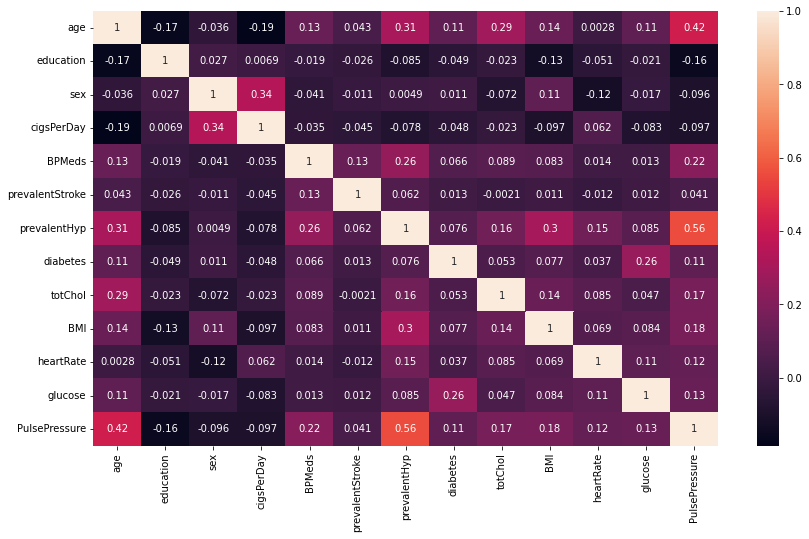

In [ ]:
# plotting correlation heatmap to check multicollinearity.
plt.figure(figsize=(14,8))
sns.heatmap(final_df.drop(columns='TenYearCHD').corr(),annot=True)

In [ ]:
correlation(df, 0.7)  #0.7--> thresold value for multicollinearity

set()

There is no high muticollinerity present within independent variables.

#####**Final feature that are provided to fit the model.**

In [ ]:
X = final_df.drop(columns='TenYearCHD') # independent features
y = final_df['TenYearCHD'] # dependent features

## **Checking data is Balanced or Imbalanced.**

0    2714
1     475
Name: TenYearCHD, dtype: int64


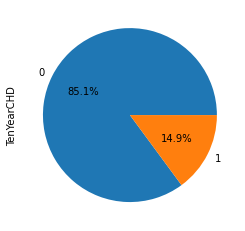

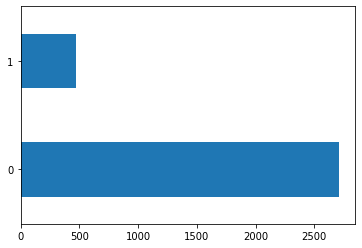

In [ ]:
# category count in target variable 
print(y.value_counts())

# plotting pie chart
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

# pltting barplot
y.value_counts().plot(kind='barh')
plt.show()

When observation in one class is much higher than the observation in other classes then there exists a class imbalance.

We can clearly see that there is a huge difference between the data set. So, our **Data is Imbalanced**. Solving this issue we **use Synthetic Minority Oversampling Technique (SMOTE)** technique.

### **Handling Imbalance Data**
Oversampling the train dataset using **SMOTE technique**

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. Repeat the steps until data is balanced. 

In [ ]:

## Handling imbalance data using SMOTE techniques
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')


Before Handling Imbalanced class Counter({0: 2714, 1: 475})
After Handling Imbalanced class Counter({0: 2714, 1: 2714})


## **Model Building**

### **Train Test Split**

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(4342, 13)
(1086, 13)


### **Scaling Data**

In [ ]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model Training**

In [ ]:

# empty list for appeding performnace metric score 
model_result = []

def predict(ml_model, model_name):
  
  '''
  Pass the model and predict value. 
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  ''' 
  
  # model fitting
  model = ml_model.fit(X_train, y_train)
  
  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics ''' 
  # accuracy score  ---->  TP+TN/TP+FP+TN+FN
  train_accuracy = accuracy_score(y_train, y_train_pred) 
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/TP+FP
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/TP+FN
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')
  
  # roc_auc score  ---->  It tells how much the model is capable of distinguishing between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classificatio report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)
  
  
  ''' plotting ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data', weight='bold')
  plt.xlabel('False Positive Rate----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T) # creating dataframe including actual value and predicted value 
  print('-'*80)


  # appneding performance metrics score to make final model_result.
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy, 
                       'test_accuracy':test_accuracy, 
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})



#### **1. Logistic Regression**

Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values. A logistic regression produces a logistic curve, which is limited to values between 0 and 1. 

Logistic regression is similar to a linear regression, but the curve is constructed using the natural logarithm of the “odds” of the target variable, rather than the probability. 

train accuracy : 0.676
test accuracy : 0.687
train precision : 0.67
test precision : 0.709
train recall : 0.677
test recall : 0.681
train f1 : 0.674
test f1 : 0.695
train roc_auc : 0.736
test roc_auc : 0.748
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       518
           1       0.71      0.68      0.69       568

    accuracy                           0.69      1086
   macro avg       0.69      0.69      0.69      1086
weighted avg       0.69      0.69      0.69      1086

--------------------------------------------------------------------------------


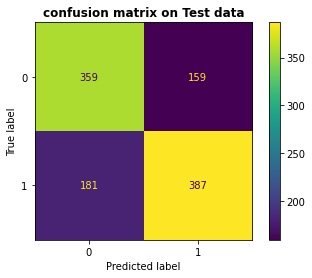

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     1     0     0     0     1     0     1
--------------------------------------------------------------------------------


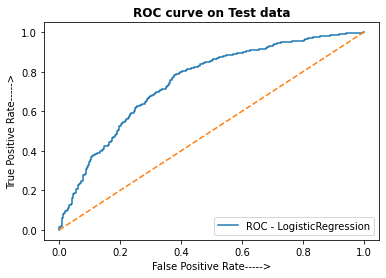

In [ ]:
predict(LogisticRegression(), 'LogisticRegression')

#### **2. SVM (Support Vector Machine)**
A Support Vector Machine (SVM) performs classification by finding the hyperplane that maximizes the margin between the two classes. The vectors (cases) that define the hyperplane are the support vectors. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.

The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three.

train accuracy : 0.763
test accuracy : 0.756
train precision : 0.746
test precision : 0.756
train recall : 0.789
test recall : 0.787
train f1 : 0.767
test f1 : 0.771
train roc_auc : 0.845
test roc_auc : 0.824
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       518
           1       0.76      0.79      0.77       568

    accuracy                           0.76      1086
   macro avg       0.76      0.75      0.75      1086
weighted avg       0.76      0.76      0.76      1086

--------------------------------------------------------------------------------


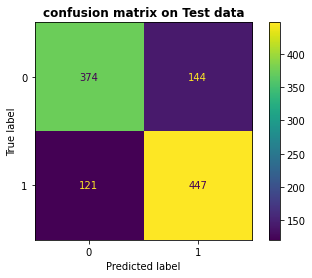

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     1     0     1     0     1     0     1
--------------------------------------------------------------------------------


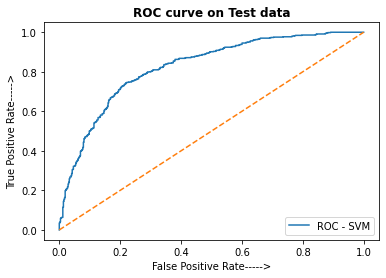

In [ ]:
predict(SVC(probability=True), 'SVM')

**Using supprt_vector_classifier alforithm we got test recall : 0.78 and test roc_auc : 0.82**

####**3. KNN (K-Nearest Neighbours)**

KNN also called K- nearest neighbour is a supervised machine learning algorithm that can be used for classification and regression problem. K nearest neighbour is non-parametric i,e. It does not make any assumptions for underlying data assumptions.Here the algorithm classifies a input or unseen data set on the basis of characterstics shared by the nearest data points. These nearest neighbours are decided on the basis of distance between two points.Some of the distance metric used are listed below:

* Eucledeon Distance
* Manhattan Distance
* Minkowsky
* Cosine Similarity Measure

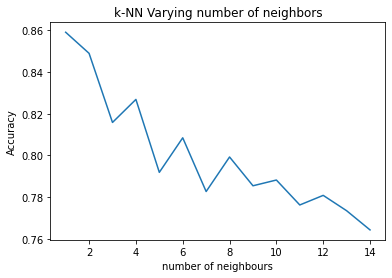

In [ ]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

K=1 gives best accuracy.

Focus on small values of k. k=3 is better than k=2. Usually for binary classification k is at least 3, and usually an odd number (to avoid ties).

The fact that you see that k=2 is better does not make sense. Therefore the only case in which k=1 is different than k=2 is when the 2 nearest neighbors have different labels. However, in this case the decision is made either randomly or arbitrarily. If you switch the roles of the labels you will probably see that k=1 is better than k=2  or  k=3 is better than k=2.

train accuracy : 1.0
test accuracy : 0.859
train precision : 1.0
test precision : 0.81
train recall : 1.0
test recall : 0.954
train f1 : 1.0
test f1 : 0.876
train roc_auc : 1.0
test roc_auc : 0.855
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       518
           1       0.81      0.95      0.88       568

    accuracy                           0.86      1086
   macro avg       0.87      0.85      0.86      1086
weighted avg       0.87      0.86      0.86      1086

--------------------------------------------------------------------------------


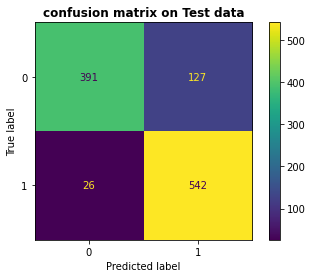

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     1     1     0     0     1     1     1
--------------------------------------------------------------------------------


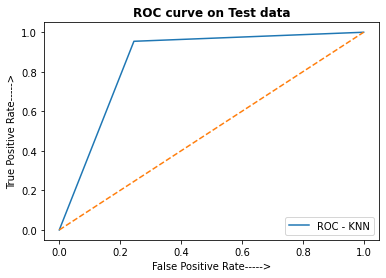

In [ ]:
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

####**4. Decision Tree**
Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. Decision trees can handle both categorical and numerical data.

 Decision Tree uses Entropy and Information Gain to construct a decision tree. 

train accuracy : 1.0
test accuracy : 0.825
train precision : 1.0
test precision : 0.824
train recall : 1.0
test recall : 0.847
train f1 : 1.0
test f1 : 0.835
train roc_auc : 1.0
test roc_auc : 0.824
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       518
           1       0.82      0.85      0.84       568

    accuracy                           0.83      1086
   macro avg       0.83      0.82      0.82      1086
weighted avg       0.83      0.83      0.82      1086

--------------------------------------------------------------------------------


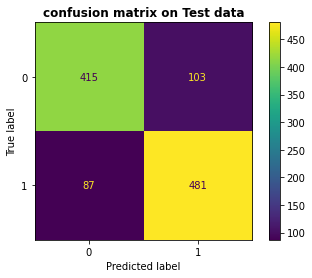

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     1     1
--------------------------------------------------------------------------------


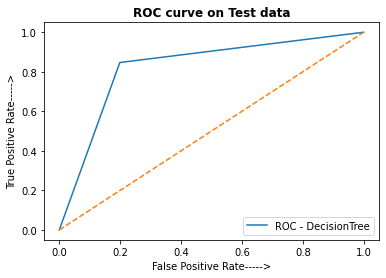

In [ ]:
predict(DecisionTreeClassifier(), 'DecisionTree')

#### **5. Random Forest**
**perform Hyperparameter Tunning - RandomizedSearchCV**

The random forest classifier can be used to solve for regression or classification problems. The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.


In [ ]:

rf_params = {'n_estimators': [500,600,800],     # number of trees in the ensemble
             'max_features': ["log2", "sqrt"],  # maximum number of features considered when splitting a node.
             'max_depth': [35,40,45,50],        # maximum number of levels allowed in each tree.
             'min_samples_split': [7,9,12],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [4,7,10]}      # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)

# model fitting 
rf_randomsearch.fit(X_train,y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

In [ ]:
optimal_model = rf_randomsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=45, max_features='log2', min_samples_leaf=4,
                       min_samples_split=7, n_estimators=600)

train accuracy : 0.975
test accuracy : 0.876
train precision : 0.989
test precision : 0.897
train recall : 0.959
test recall : 0.861
train f1 : 0.974
test f1 : 0.879
train roc_auc : 0.998
test roc_auc : 0.952
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       518
           1       0.90      0.86      0.88       568

    accuracy                           0.88      1086
   macro avg       0.88      0.88      0.88      1086
weighted avg       0.88      0.88      0.88      1086

--------------------------------------------------------------------------------


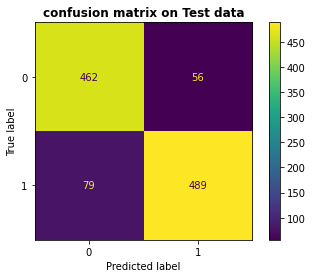

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


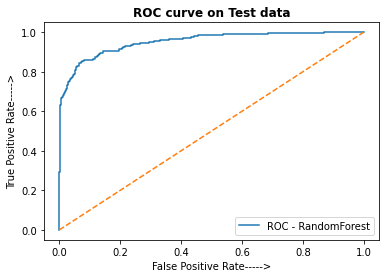

In [ ]:
predict(optimal_model, 'RandomForest')

In [ ]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary in order to form the dataframe
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
0,age,0.202614
1,education,0.181628
12,PulsePressure,0.126926
8,totChol,0.102618
10,heartRate,0.090877
11,glucose,0.086193
3,cigsPerDay,0.079040
9,BMI,0.078299
4,BPMeds,0.024596
2,sex,0.013400


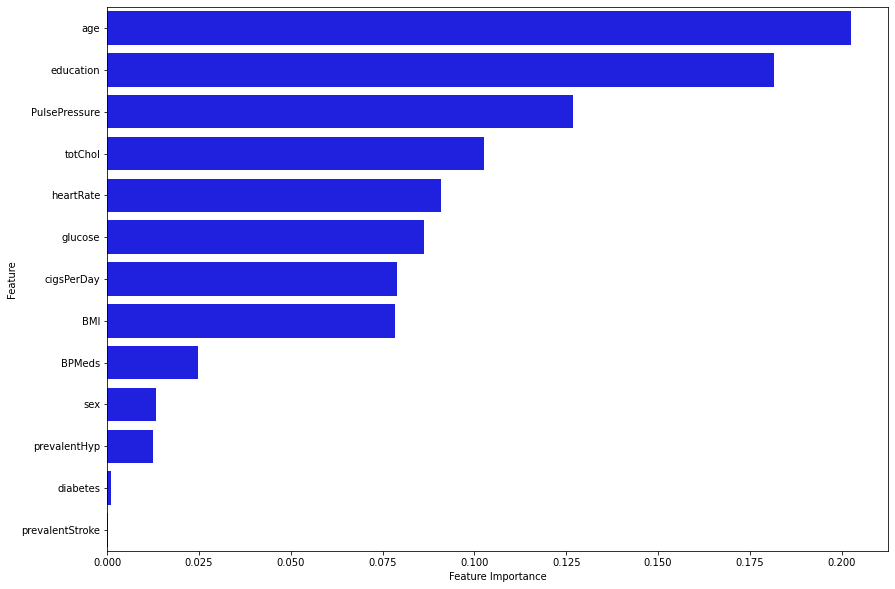

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(14,10))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

#### **6. AdaBoost**
AdaBoost, short for Adaptive Boosting, is a machine learning algorithm that can be used to improve the performance of other learning algorithms. It works by weighting training data points, such that the algorithm focuses more on the misclassified examples in each iteration of the training process. This weighting allows the algorithm to iteratively improve its performance by focusing on the examples that are difficult to classify.

train accuracy : 0.816
test accuracy : 0.813
train precision : 0.839
test precision : 0.849
train recall : 0.776
test recall : 0.782
train f1 : 0.806
test f1 : 0.814
train roc_auc : 0.901
test roc_auc : 0.895
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       518
           1       0.85      0.78      0.81       568

    accuracy                           0.81      1086
   macro avg       0.81      0.81      0.81      1086
weighted avg       0.82      0.81      0.81      1086

--------------------------------------------------------------------------------


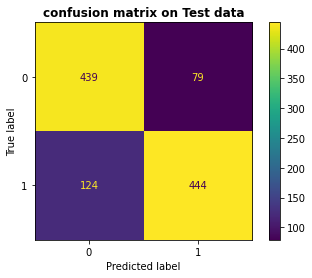

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


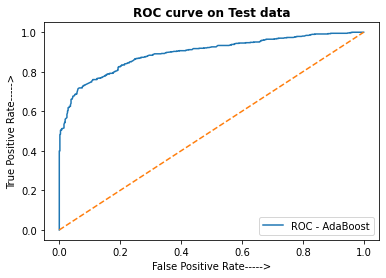

In [ ]:
predict(AdaBoostClassifier(), 'AdaBoost')

#### **7. XGBoost** 
**perform HyperParameter Tunning - GridSearchCV**

The XGBoost can be used to solve for regression or classification problems.

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting.


In [ ]:

xgb_params = {'n_estimators': [1000],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7], 'n_estimators': [1000]},
             verbose=2)

In [ ]:
optimal_model = xgb_gridsearch.best_estimator_
optimal_model

XGBClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=5,
              n_estimators=1000)

train accuracy : 1.0
test accuracy : 0.908
train precision : 1.0
test precision : 0.947
train recall : 1.0
test recall : 0.873
train f1 : 1.0
test f1 : 0.908
train roc_auc : 1.0
test roc_auc : 0.959
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       518
           1       0.95      0.87      0.91       568

    accuracy                           0.91      1086
   macro avg       0.91      0.91      0.91      1086
weighted avg       0.91      0.91      0.91      1086

--------------------------------------------------------------------------------


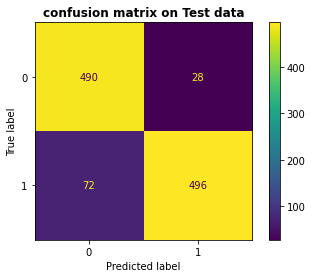

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


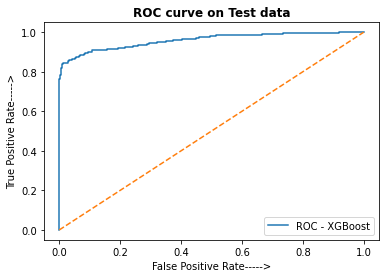

In [ ]:
predict(optimal_model, 'XGBoost')

In [ ]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary in order to form the dataframe
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
4,BPMeds,0.241710
1,education,0.212361
0,age,0.124280
7,diabetes,0.081555
3,cigsPerDay,0.071511
10,heartRate,0.047722
12,PulsePressure,0.042176
11,glucose,0.040404
8,totChol,0.039704
6,prevalentHyp,0.035882


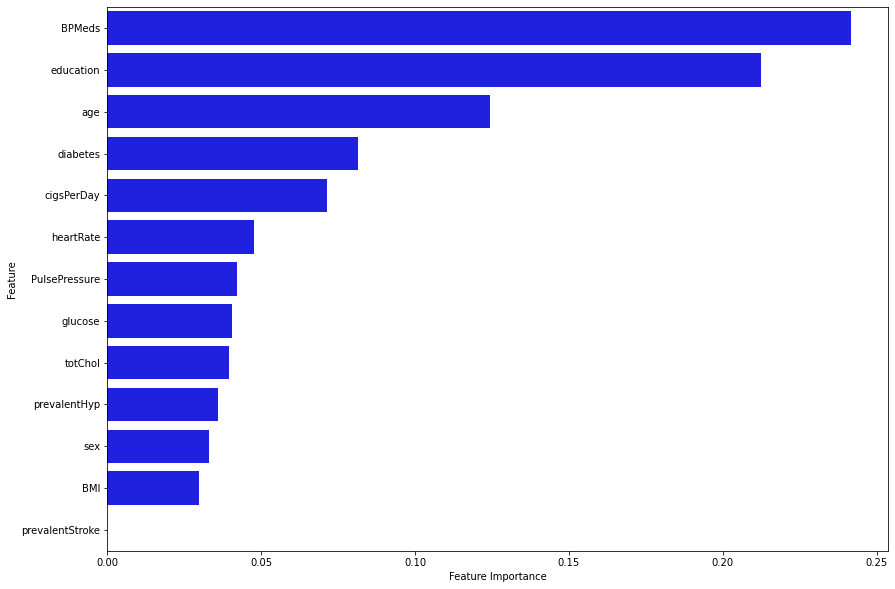

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(14,10))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

#### **8. Light Gradient Boosting**
**perform HyperParameter Tunning - GridSearchCV**

LightGBM is widely used in a variety of applications, such as regression, classification.

Like XGBoost, LightGBM uses gradient boosting to train ensembles of weak models, such as decision trees, and combine them into a single strong model. However, LightGBM uses several techniques that make it faster and more efficient than XGBoost, such as histogram-based algorithms for decision tree learning, which can reduce the amount of data that needs to be processed and make the training process more efficient.

In [ ]:

lgb_params = {'n_estimators': [1000],   # number of trees in the ensemble
          'max_depth': [7,9],           # maximum number of levels allowed in each tree.
          'min_samples_split': [4,5],   # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [4,6],    # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}        # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
lgb = LGBMClassifier(objective='binary')
lgb_gridsearch = GridSearchCV(estimator=lgb, param_grid=lgb_params, cv=5, verbose=2, n_jobs=-1)
lgb_gridsearch.fit(X_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [7, 9],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5], 'n_estimators': [1000]},
             verbose=2)

In [ ]:
optimal_model = lgb_gridsearch.best_estimator_
optimal_model

LGBMClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=4,
               n_estimators=1000, objective='binary')

train accuracy : 1.0
test accuracy : 0.908
train precision : 1.0
test precision : 0.953
train recall : 1.0
test recall : 0.866
train f1 : 1.0
test f1 : 0.908
train roc_auc : 1.0
test roc_auc : 0.957
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       518
           1       0.95      0.87      0.91       568

    accuracy                           0.91      1086
   macro avg       0.91      0.91      0.91      1086
weighted avg       0.91      0.91      0.91      1086

--------------------------------------------------------------------------------


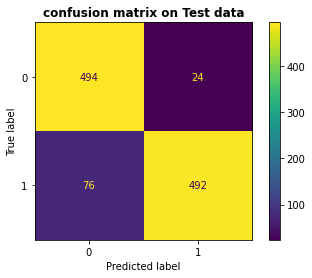

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


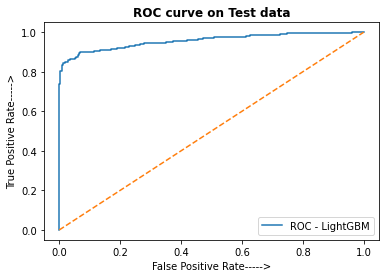

In [ ]:
predict(optimal_model, 'LightGBM')

In [ ]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary in order to form the dataframe
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
8,totChol,4999
12,PulsePressure,4297
9,BMI,4227
0,age,4024
10,heartRate,3913
11,glucose,3761
3,cigsPerDay,1933
1,education,1512
2,sex,444
6,prevalentHyp,339


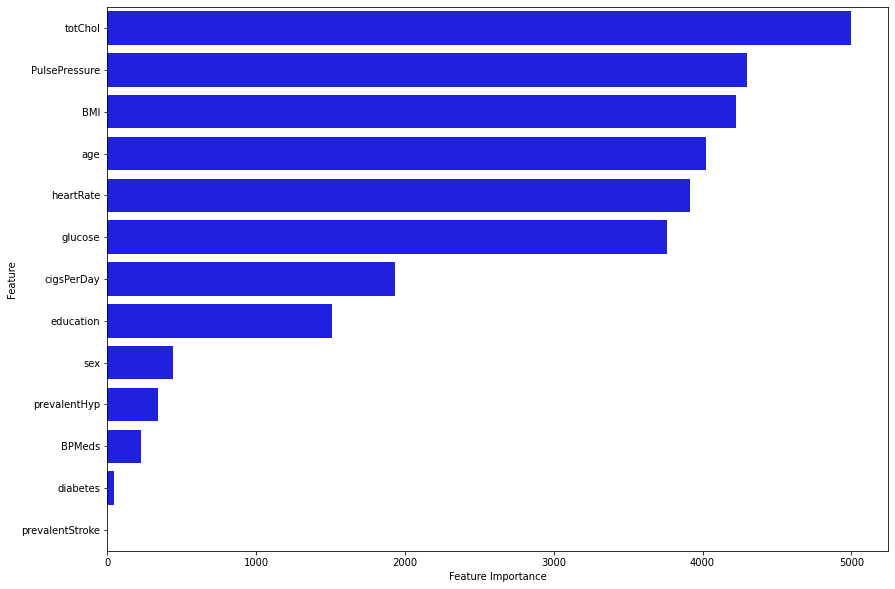

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(14,10))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### **Model Result**

In [ ]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.676,0.687,0.670,0.709,0.677,0.681,0.674,0.695,0.736,0.748
1,SVM,0.763,0.756,0.746,0.756,0.789,0.787,0.767,0.771,0.845,0.824
2,KNN,1.000,0.859,1.000,0.810,1.000,0.954,1.000,0.876,1.000,0.855
3,DecisionTree,1.000,0.825,1.000,0.824,1.000,0.847,1.000,0.835,1.000,0.824
4,RandomForest,0.975,0.876,0.989,0.897,0.959,0.861,0.974,0.879,0.998,0.952
5,AdaBoost,0.816,0.813,0.839,0.849,0.776,0.782,0.806,0.814,0.901,0.895
6,XGBoost,1.000,0.908,1.000,0.947,1.000,0.873,1.000,0.908,1.000,0.959
7,LightGBM,1.000,0.908,1.000,0.953,1.000,0.866,1.000,0.908,1.000,0.957


**The dataset that we have majority count belong from negative class and minority count belong from positive class.**

While dealing with Imbalanced data Accuracy score dosen't help much in Imbalanced class situations.

It is okay to classify a healthy person as having 10-year risk of coronary heart disease CHD (false positive) and following up with more medical tests, but it is definitely not okay to miss identifying a dieses patient or classifying a dieses patient as healthy (false negative). **Thus our study will be more focused towards the recall score of the model.**

In cases where positives are as important as negatives, balanced accuracy is a better metric for this than F1. **F1 is a great scoring metric for imbalanced data when more attention is needed o.**


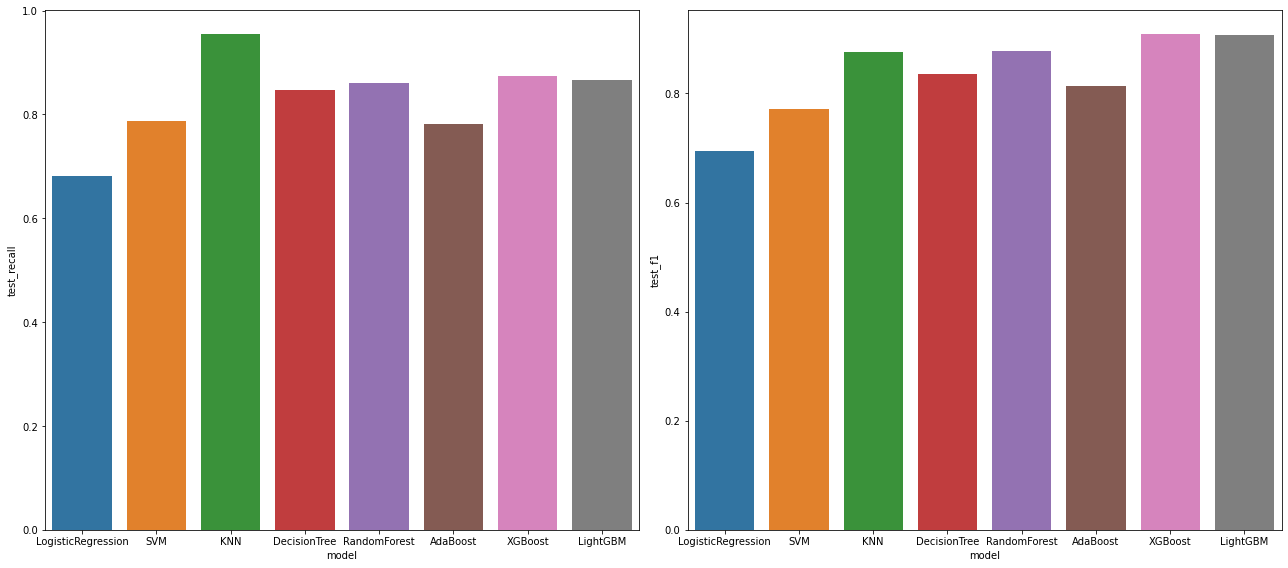

In [ ]:
# plotting graph ---> compairing model performance
fig, axs = plt.subplots(1,2, figsize=(18,8))
sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=axs[0]) # Model vs Recall score
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=axs[1])     # Model vs F1 score 
plt.tight_layout()

**Selecting Final model as KNN because it has Highest Recall scroe and we dont want to mispredict a person safe when he has the risk of 10 years of CHD)**

## **Summary**
Importing necessary libraries and dataset. Then perform EDA to get a clear insight of the each feature, The raw data was cleaned by treating the outliers and null values. Transformation of data was done in order to ensure it fits well into machine learning models. Then finally the cleaned form of data was passed into different models and the metrics were generated to evaluate the model and then we did hyperparameter tuning in order to ensure the correct parameters being passed to the model. Then check all the model_result in order to select final model based on requirement.

## **Conclusion**

In general, it is good practice to track multiple metrics when developing a machine learning model as each highlights different aspects of model performance. However we are dealing with Heathcare data and our data is imbalanced for that perticular reason we are more focusing towards the Recall score and F1 score.  

* We've noticed that XBG Classifier is the stand out performer among all models with an f1-score of 0.908 and recall score of 0.873 on test data. it's safe to say that XGB Classifier provides an optimal solution to our problem.

* In case of Logistic regression, We were able to see the maximum f1-score of 0.695.

* KNN gave us Highest recall score of 0.954%.

* Out of the tree-based algorithms, LGBMClassifier and RandomForestClassifier  was alsi providing an optimal solution towards achieving our Objective. We were able to achieve an f1-score of 0.908 and 0.884 respectively.

* For SVM(Support Vector Machines) Classifier, the f1-score lies around 0.774.

In the medical domain (more focus towards the reducing False negative values, as we dont want to mispredict a person safe when he has the risk) here hte recall score is the most importance. KNN, XGB, LGBM Random Forest gave the best recall score 0.954 ,0.873 ,0.866, 0.863 respectively.

**Finally, we can select Final model as KNN Classifier because it has Highest Recall scroe and It is okay to classify a healthy person as having 10-year risk of coronary heart disease CHD (false positive) and following up with more medical tests, but it is definitely not okay to miss identifying a dieses patient or classifying a dieses patient as healthy (false negative).**